# Coding Exercises for Mechanical Engineers

In [1]:
import matplotlib.pyplot as plt  
import matplotlib.animation as animation
import numpy as np  
import math as m
from scipy.integrate import odeint

## B1: Analyzing Cyclist Air Resistance: Velocity, Drag Coefficient, and Performance

In [2]:
# Create function for drag force
def dragForce(density, area, velocity, drag):
    F_d = (density * area * velocity**2 * drag)/2
    return F_d

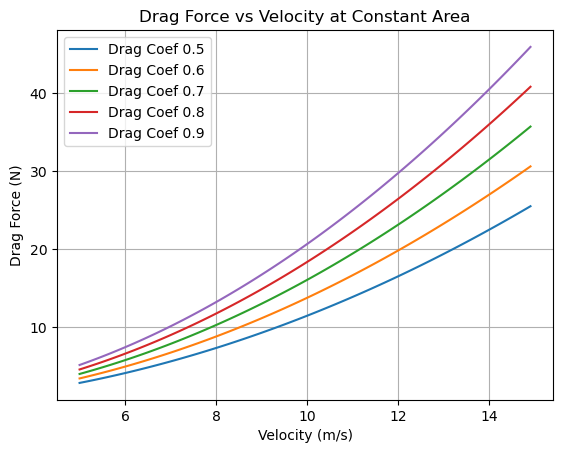

In [3]:
# Plot Drag Force vs Velocity for given conditions (range of Cd's, fixed area)
# Define constants and variable ranges
rho = 1.225; # kg/m3 (for air)
A_f = 0.375; # m2 (Can range from 0.25 to 0.5) 
V = np.arange(5, 15, 0.1); # m/s (Can range from 5 to 15 m/s2)
C_d = np.arange(0.5, 1, 0.1); # Drag coefficient (Can range from 0.5 to 1.0)
n_Cd = len(C_d);
n_V = len(V); 

# Build array for data storage
data_DragForce = np.zeros((n_Cd, n_V)); 

for i in range(n_Cd): 
    for j in range(n_V):
        data_DragForce[i,j] = dragForce(rho, A_f, V[j], C_d[i]);

# Plot each row as a separate line
for i, row in enumerate(data_DragForce):
    plt.plot(V, row, label=f'Drag Coef {round(C_d[i],2)}')  # Plot row with label

# Add labels and title
plt.xlabel("Velocity (m/s)")
plt.ylabel("Drag Force (N)")
plt.title("Drag Force vs Velocity at Constant Area")
plt.legend()  # Show legend
plt.grid(True)  # Add grid
plt.show()

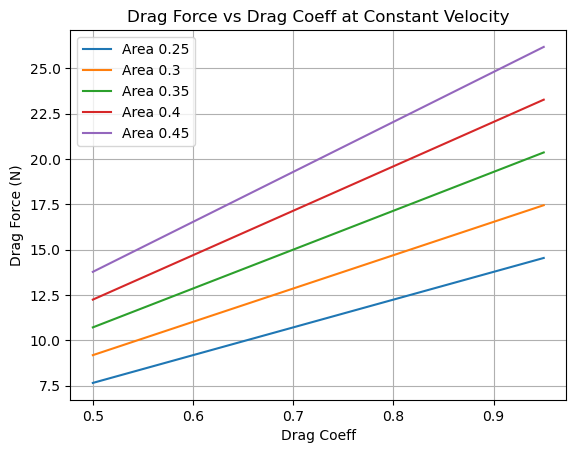

In [4]:
# Plot Drag Force vs Drag Coefficient for given conditions (range of area, fixed velocity)
# Define constants and variable ranges
rho = 1.225; # kg/m3 (for air)
A_f = np.arange(0.25, 0.5, 0.05); # m2 (Can range from 0.25 to 0.5) 
V = 10; # m/s (Can range from 5 to 15 m/s2)
C_d = np.arange(0.5, 1, 0.05); # Drag coefficient (Can range from 0.5 to 1.0)
n_Cd = len(C_d);
n_Af = len(A_f); 

# Build array for data storage
data_DragForce = np.zeros((n_Af, n_Cd)); 

for i in range(n_Af): 
    for j in range(n_Cd):
        data_DragForce[i,j] = dragForce(rho, A_f[i], V, C_d[j]);

# Plot each row as a separate line
for k, row in enumerate(data_DragForce):
    plt.plot(C_d, row, label=f'Area {round(A_f[k],2)}')  # Plot row with label

# Add labels and title
plt.xlabel("Drag Coeff")
plt.ylabel("Drag Force (N)")
plt.title("Drag Force vs Drag Coeff at Constant Velocity")
plt.legend()  # Show legend
plt.grid(True)  # Add grid

## B2: 2R Robotic Arm Kinematics Simulation: From Equations to Animation

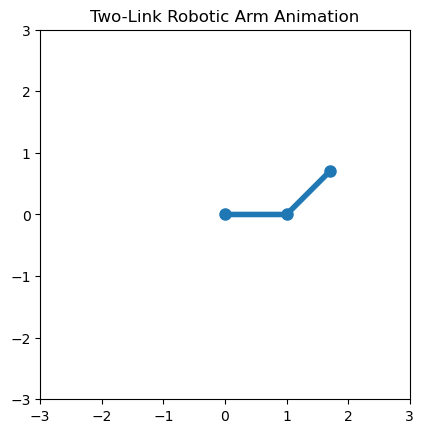

In [5]:
# Define constants
x0 = 0; # Base position
y0 = 0; # Base position
L1 = 1; # Arm link 1 length
L2 = 1; # Arm link 2 length

# # Define variables
# theta1 = np.linspace(0, np.pi, 100); 
# theta2 = np.linspace(0, np.pi, 100); 

# Generate joint angles (θ1, θ2) over time
t = np.linspace(0, 2*np.pi, 100)  # Time points
theta1 = np.sin(t) * np.pi / 4     # Varying θ1 (-45 to 45 degrees)
theta2 = np.cos(t) * np.pi / 4     # Varying θ2 (-45 to 45 degrees)

# Define position calculation functions
def endPos(x0, y0, L1, L2, theta1, theta2):
    x1 = L1 * np.cos(theta1);
    y1 = L1 * np.sin(theta1);
    x2 = x1 + L2 * np.cos(theta2);
    y2 = y1 + L2 * np.sin(theta2);
    joint_pos = np.array([[x1, y1], 
            [x2, y2]]);
    return joint_pos

# Create figure
fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')

# Initialize lines for the arm
line, = ax.plot([], [], 'o-', lw=4, markersize=8)


# Update function for animation
def update(i):
    # Compute joint positions
    joint_pos = endPos(x0, y0, L1, L2, theta1[i], theta2[i]);

    # Update line data
    line.set_data([0, joint_pos[0,0], joint_pos[1,0]], [0, joint_pos[0, 1], joint_pos[1,1]])
    return line,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(theta1), interval=20, blit=True)

plt.title("Two-Link Robotic Arm Animation")
plt.show()

ani.save('robotic_arm.mp4', writer='ffmpeg', fps=30)


## B3: Otto Cycle Simulation and Analysis: Efficiency and PV Diagram

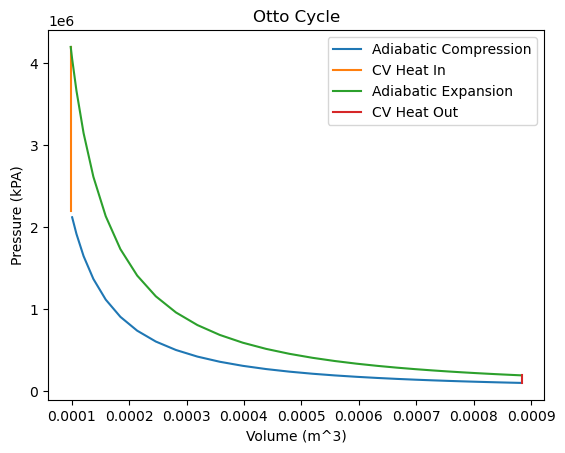

In [6]:
# Define contsants and variables
d_bore = 0.1; # Bore diameter
L_stroke = 0.1; # Stroke length
L_cr = 0.15; # Connecting rod length
r_comp = 9; # Compression ratio
gamma = 1.4; # Specific heat ratio
P1 = 101325; # Initial Pressure
T1 = 500; # Initial temperature
T3 = 2300; # Heat addition temperature
R = 2*L_cr/L_stroke; 

# Get general volume calculations at known points (clearance, bottom dead center, top dead center)
volume_stages = np.zeros(4);
v_swept = np.pi/4 * d_bore**2 * L_stroke;
v_clearance = v_swept/(r_comp - 1);
v_BDC = v_swept + v_clearance;
v_TDC = v_clearance; 

# Create function for instantaneous volume calculations based on crank angle
def instantVolume(v_clearance, r_comp, thetas, R):
    vol =  v_clearance * (1 + (((r_comp-1)/2) * (1 + R - np.cos(thetas) - np.sqrt((R**2 - (np.sin(thetas)**2))))));
    return vol;

# Create function for pressure calculations 
def pressureFromVolume(P1, V1, V2, gamma):
    P2 = P1 * ((V1/V2) ** gamma);
    return P2

# Create a function for temperature calculations from ideal gas law
def  temperatureIdealGas(T1, P1, V1, P2, V2):
    T2 = (P2*V2*T1)/(P1*V1);
    return T2

# Create a function for pressure calculations from ideal gas law
def  pressureIdealGas(T1, P1, V1, T2, V2):
    P2 = (P1*V1*T2)/(T1*V2); 
    return P2


# Create a function for getting pressure during isentropic stages from instantaeneous volume
def instantPressure(volumes, P_init, V_init, gamma):
    pressures = np.zeros(len(volumes)); # Pressures

    for i in range(len(volumes)):
        pressures[i] = pressureFromVolume(P_init, V_init, volumes[i], gamma);

    return pressures


# Compute PVT values for segment 1 to 2: isentropic compression
V1 = v_BDC;
V2 = v_TDC;
P2 = pressureFromVolume(P1, V1, V2, gamma); 
T2 = temperatureIdealGas(T1, P1, V1, P2, V2); 

theta_array_1_2 = np.arange(-np.pi, 0, np.pi/32);  # Crank angle from bottom to top
volumes_1_2 = instantVolume(v_clearance, r_comp, theta_array_1_2, R);  # Volumes
pressures_1_2 = instantPressure(volumes_1_2, P1, V1, gamma);


# Compute PVT values for segment 2 to 3: constant volume heat addition
V3 = V2;
P3 = pressureIdealGas(T2, P2, V2, T3, V3)
volumes_2_3 = [V2, V3];
pressures_2_3 = [P2, P3];

# Compute PVT values for segment 3 to 4: isentropic expansion
V4 =  V1;
P4 = pressureFromVolume(P3, V3, V4, gamma); 
T4 = temperatureIdealGas(T3, P3, V3, P4, V4);
theta_array_3_4 = np.arange(0, np.pi, np.pi/32);  # Crank angle from top to bottom
volumes_3_4 = instantVolume(v_clearance, r_comp, theta_array_3_4, R);  # Volumes
pressures_3_4 = instantPressure(volumes_3_4, P3, V3, gamma);

# Compute PVT values for segment 4 to 1: constant volume heat rejection
volumes_4_1 = [V4, V1];
pressures_4_1 = [P4, P1];

# Plot Data
plt.plot(volumes_1_2, pressures_1_2, label = 'Adiabatic Compression')
plt.plot(volumes_2_3, pressures_2_3, label = 'CV Heat In')
plt.plot(volumes_3_4, pressures_3_4, label = 'Adiabatic Expansion')
plt.plot(volumes_4_1, pressures_4_1, label = 'CV Heat Out')

plt.title("Otto Cycle")
plt.legend()
plt.xlabel("Volume (m^3)")
plt.ylabel("Pressure (kPA)")
plt.show()

## B4: Simulating and Animating Damped Pendulum Motion

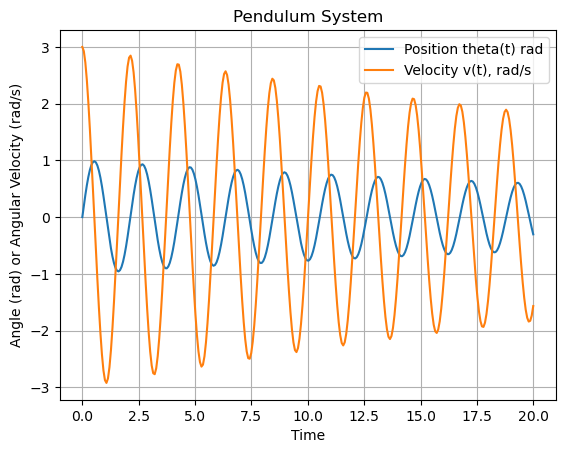

In [7]:
# Define contsants and variables
L = 1;  # Pendulum length (m) 
m = 1; # Ball mass (kg)
b = 0.05; # Dampening
g = 9.81; # Gravity (m/s^2)

# Define initial conditions at t = 0
theta0 = 0; # Angle (rad)
v0 = 3; # Angular velocity (rad/sec )

# Define time
t = np.linspace(0, 20, 300); # 20 seconds

# Define ODE
def mass_pendulum_damper(y, t, L, m, b, g):
    theta, v = y;  # y contains [theta, v]
    dtheta_dt = v;
    dv_dt = (-b/m)*v - (g/L)*np.sin(theta); 
    return [dtheta_dt, dv_dt]

# Solve ODE
y0 = [theta0, v0]; # Intial conditions
solution = odeint(mass_pendulum_damper, y0, t, args=(L,m,b,g))
theta = solution[:, 0]; # Extract position
v = solution[:, 1]; # Extract velocity

# Plot position and velocity
plt.figure()
plt.plot(t, theta, label="Position theta(t) rad")
plt.plot(t, v, label="Velocity v(t), rad/s")
plt.xlabel("Time")
plt.ylabel("Angle (rad) or Angular Velocity (rad/s)")
plt.title("Pendulum System")
plt.legend()
plt.grid()
plt.show()

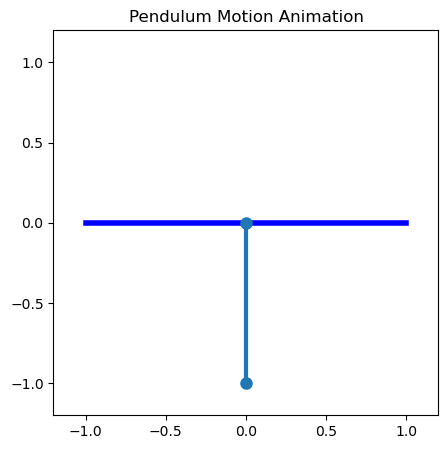

In [8]:
# Create animation of pendulum

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-L-0.2, L+0.2)
ax.set_ylim(-L-0.2, L+0.2)
ax.set_aspect('equal')
ax.set_title("Pendulum Motion Animation")

# Draw support and pendulum rod/bob
ax.plot([-1, 1], [0, 0], 'b', lw=4);  # Support
line, = ax.plot([], [], 'o-', lw=3, markersize=8)

# Animation update function
def update(i):
    angle = theta[i];
    vel = v[i];
    x = L * (np.sin(angle));
    y = -L * (np.cos(angle)); 
    line.set_data([0, x], [0, y])  # Update pendulum rod and bob position
    return line,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)

plt.show()

ani.save('pendulum.mp4', writer='ffmpeg', fps=30)